<a href="https://colab.research.google.com/github/Abdurrohman1/skirpsi/blob/main/BrainTumorV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
from glob import glob
import random
from tensorflow.keras import layers, models, Input, callbacks
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Read Data

In [ ]:
train_dir = '/content/drive/MyDrive/Private Class Abdurrohman - Brain Tumor VGG16/Data/Training'
test_dir = '/content/drive/MyDrive/Private Class Abdurrohman - Brain Tumor VGG16/Data/Testing'

# Preprocessing Image

In [ ]:
IMG_SIZE = (224, 224)

datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.15
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True)


test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Modelling

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,692,612 (105.64 MB)

 Trainable params: 12,977,924 (49.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('brain_tumor_vgg16.h5',
                            monitor='val_accuracy',
                            save_best_only=True,
                            mode='max',
                            verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              restore_best_weights=True)

# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=val_gen,
    validation_steps=val_gen.samples // val_gen.batch_size,
    epochs=30,
    callbacks=[checkpoint, early_stopping]
)

model.save('/content/drive/MyDrive/Private Class Abdurrohman - Brain Tumor VGG16/Model/brain_tumor_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6605 - loss: 0.8005 
Epoch 1: val_accuracy improved from -inf to 0.74880, saving model to brain_tumor_vgg16.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 3199s 21s/step - accuracy: 0.6613 - loss: 0.7990 - val_accuracy: 0.7488 - val_loss: 0.6201
Epoch 2/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 51:43 21s/step - accuracy: 0.7812 - loss: 0.4718

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.74880
151/151 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.7812 - loss: 0.4718 - val_accuracy: 0.7476 - val_loss: 0.6189
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.8717 - loss: 0.3376 
Epoch 3: val_accuracy improved from 0.74880 to 0.82812, saving model to brain_tumor_vgg16.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 3097s 21s/step - accuracy: 0.8717 - loss: 0.3374 - val_accuracy: 0.8281 - val_loss: 0.5260
Epoch 4/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 42:56 17s/step - accuracy: 0.9062 - loss: 0.3085
Epoch 4: val_accuracy improved from 0.82812 to 0.83053, saving model to brain_tumor_vgg16.h5


151/151 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.9062 - loss: 0.3085 - val_accuracy: 0.8305 - val_loss: 0.5337
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9057 - loss: 0.2516 
Epoch 5: val_accuracy did not improve from 0.83053
151/151 ━━━━━━━━━━━━━━━━━━━━ 3134s 21s/step - accuracy: 0.9057 - loss: 0.2515 - val_accuracy: 0.8281 - val_loss: 0.5807
Epoch 6/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 51:24 21s/step - accuracy: 0.7188 - loss: 0.6486
Epoch 6: val_accuracy did not improve from 0.83053
151/151 ━━━━━━━━━━━━━━━━━━━━ 477s 3s/step - accuracy: 0.7188 - loss: 0.6486 - val_accuracy: 0.8173 - val_loss: 0.5339
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9233 - loss: 0.2012 
Epoch 7: val_accuracy did not improve from 0.83053
151/151 ━━━━━━━━━━━━━━━━━━━━ 3139s 21s/step - accuracy: 0.9232 - loss: 0.2012 - val_accuracy: 0.8281 - val_loss: 0.4905
Epoch 8/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 42:16 17s/step - accuracy: 0.9688 - loss: 0.1132
Epoch 8: val_accura

151/151 ━━━━━━━━━━━━━━━━━━━━ 3130s 21s/step - accuracy: 0.9342 - loss: 0.1831 - val_accuracy: 0.8678 - val_loss: 0.3931
Epoch 10/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 42:40 17s/step - accuracy: 1.0000 - loss: 0.0385
Epoch 10: val_accuracy did not improve from 0.86779
151/151 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 1.0000 - loss: 0.0385 - val_accuracy: 0.8678 - val_loss: 0.3868
Epoch 11/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9433 - loss: 0.1566 
Epoch 11: val_accuracy did not improve from 0.86779
151/151 ━━━━━━━━━━━━━━━━━━━━ 3108s 21s/step - accuracy: 0.9433 - loss: 0.1566 - val_accuracy: 0.8618 - val_loss: 0.4638
Epoch 12/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 42:23 17s/step - accuracy: 1.0000 - loss: 0.0732
Epoch 12: val_accuracy did not improve from 0.86779
151/151 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 1.0000 - loss: 0.0732 - val_accuracy: 0.8594 - val_loss: 0.4528
Epoch 13/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9484 - loss: 0.1393 
Epoch 13: va

151/151 ━━━━━━━━━━━━━━━━━━━━ 3116s 21s/step - accuracy: 0.9484 - loss: 0.1392 - val_accuracy: 0.8690 - val_loss: 0.4267
Epoch 14/30
  1/151 ━━━━━━━━━━━━━━━━━━━━ 44:15 18s/step - accuracy: 0.9688 - loss: 0.1116
Epoch 14: val_accuracy did not improve from 0.86899
151/151 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.9688 - loss: 0.1116 - val_accuracy: 0.8642 - val_loss: 0.4507
Epoch 15/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9603 - loss: 0.1131 
Epoch 15: val_accuracy did not improve from 0.86899
151/151 ━━━━━━━━━━━━━━━━━━━━ 3143s 21s/step - accuracy: 0.9603 - loss: 0.1130 - val_accuracy: 0.8678 - val_loss: 0.4233


# Evaluation

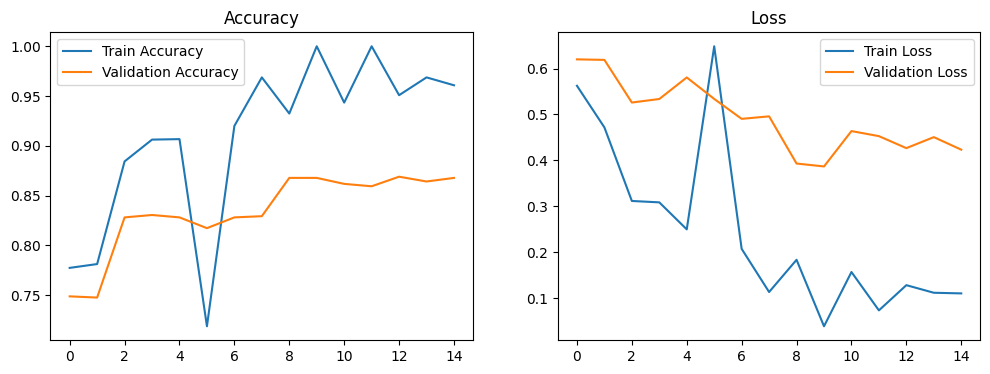

41/41 ━━━━━━━━━━━━━━━━━━━━ 723s 18s/step - accuracy: 0.9025 - loss: 0.2180
Test Accuracy: 0.9054
Test Loss: 0.2186


In [ ]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

def predict_tumor(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = np.max(pred)

    # Get class label
    class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

    # Display the image
    plt.imshow(mpimg.imread(img_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[class_idx]}\nConfidence: {confidence:.2f}')
    plt.show()

    return class_labels[class_idx], confidence



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


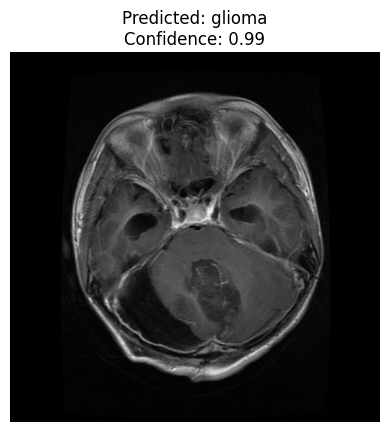

('glioma', np.float32(0.98803467))

In [ ]:
predict_tumor('/content/drive/MyDrive/Private Class Abdurrohman - Brain Tumor VGG16/Data/Testing/glioma/Te-glTr_0000.jpg')

# Evaluation

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 753s 18s/step
=== Classification Report ===
              precision    recall  f1-score   support

      glioma       0.25      0.25      0.25       300
  meningioma       0.23      0.24      0.23       306
     notumor       0.31      0.31      0.31       405
   pituitary       0.22      0.22      0.22       300

    accuracy                           0.26      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.26      0.26      0.26      1311



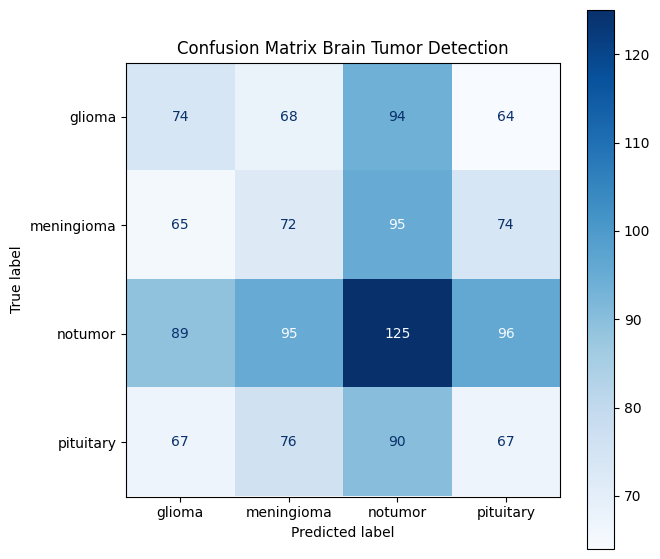

41/41 ━━━━━━━━━━━━━━━━━━━━ 732s 18s/step - accuracy: 0.9068 - loss: 0.2628
Test Accuracy: 0.8993
Test Loss: 0.2713


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model_path = '/content/drive/MyDrive/Private Class Abdurrohman - Brain Tumor VGG16/Model/brain_tumor_model.h5'

# Load model
model = load_model(model_path)


# Predict data test
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Ambil nama kelas
class_names = list(test_gen.class_indices.keys())

# Classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix Brain Tumor Detection')
plt.show()

test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')
